## Primera optimización del árbol de decisión - cambio del punto de corte

### Recapitulando

In [1]:
import pandas as pd
#import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

#from IPython.display import Image  

In [2]:
directorio_data = '../data/'

x_training_file = directorio_data + 'x_traininig.csv'
y_training_file = directorio_data + 'y_traininig.csv'

x_testing_file = directorio_data + 'x_testing.csv'
y_testing_file = directorio_data + 'y_testing.csv'

In [3]:
df_x_training_validacion = pd.read_csv(x_training_file)
df_y_training_validacion = pd.read_csv(y_training_file)

X_testing = pd.read_csv(x_testing_file)
Y_testing = pd.read_csv(y_testing_file)

### Separamos nuestro dataset training-validación en training y validación

In [4]:
random_state = 661
test_size = 0.3

X_training, X_validacion, Y_training, Y_validacion = train_test_split(
    df_x_training_validacion, 
    df_y_training_validacion, 
    test_size=test_size, 
    random_state=random_state,
    stratify=df_y_training_validacion
)

### Dejamos solo las columnas que queremos

In [6]:
columnas = [
    "review_overall",
    "review_aroma",
    "review_appearance",
    "review_palate",
    "review_taste",
    "beer_abv"
]

In [7]:
X_training = X_training[columnas]
X_validacion = X_validacion[columnas]
X_testing = X_testing[columnas]

### Generamos el modelo

In [8]:
max_depth = 4
criterion='gini'
clf = DecisionTreeClassifier(
            criterion = criterion,
            max_depth=max_depth,
            random_state=random_state
        )
_ = clf.fit(X_training, Y_training)

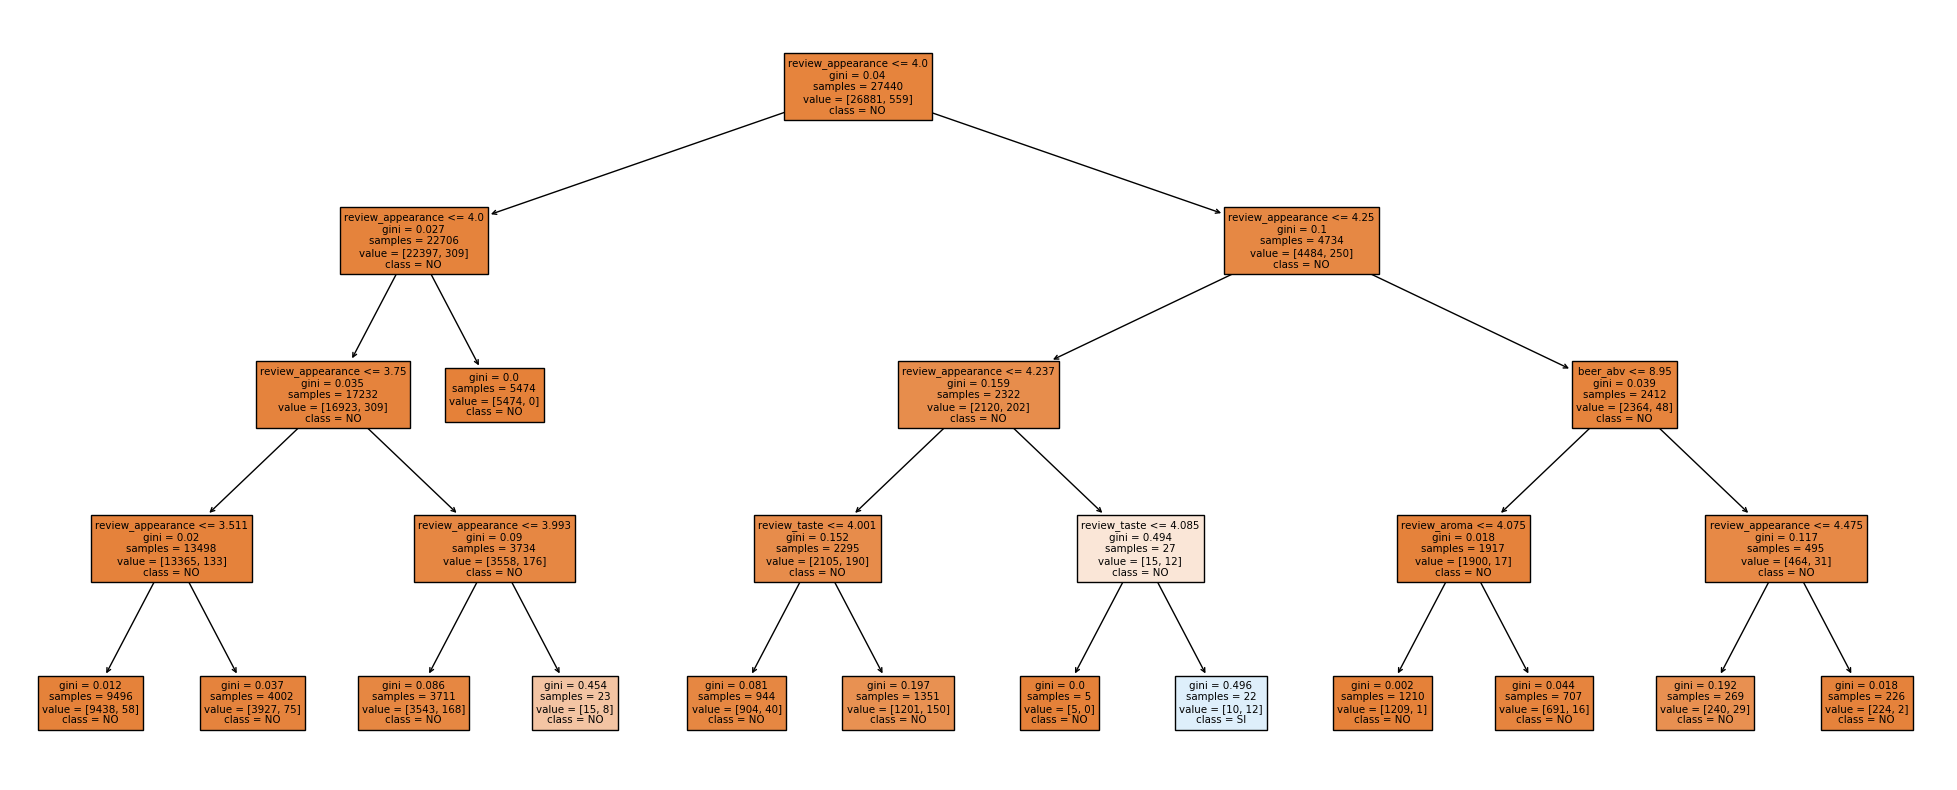

In [9]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(clf, 
                   feature_names=X_training.columns,  
                   class_names=Y_training['POPULAR'].unique(),
                   filled=True)

### El puntaje con los datos de validacion

In [10]:
Y_validacion_pred = clf.predict(X_validacion)

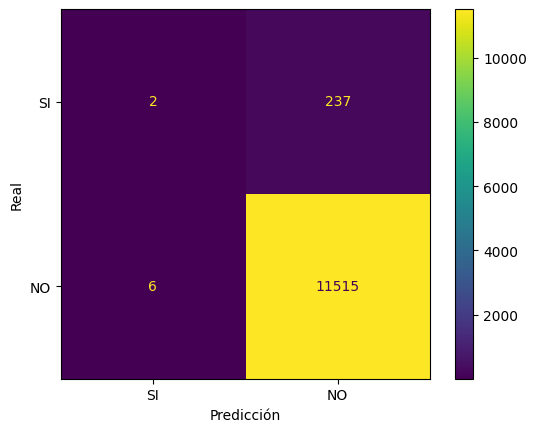

In [11]:
cm = confusion_matrix(Y_validacion, Y_validacion_pred, labels=['SI', 'NO'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['SI', 'NO'])
disp.plot()
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [12]:
true_positives = cm[0,0]
true_negatives = cm[1,1]
false_positives = cm[1, 0]
false_negatives = cm[0,1]

[true_positives, false_positives, true_negatives, false_negatives]

[2, 6, 11515, 237]

In [13]:
metrica_negocio = ((4000*true_positives) - (500*false_positives))/(true_positives + false_negatives)
metrica_negocio

20.92050209205021

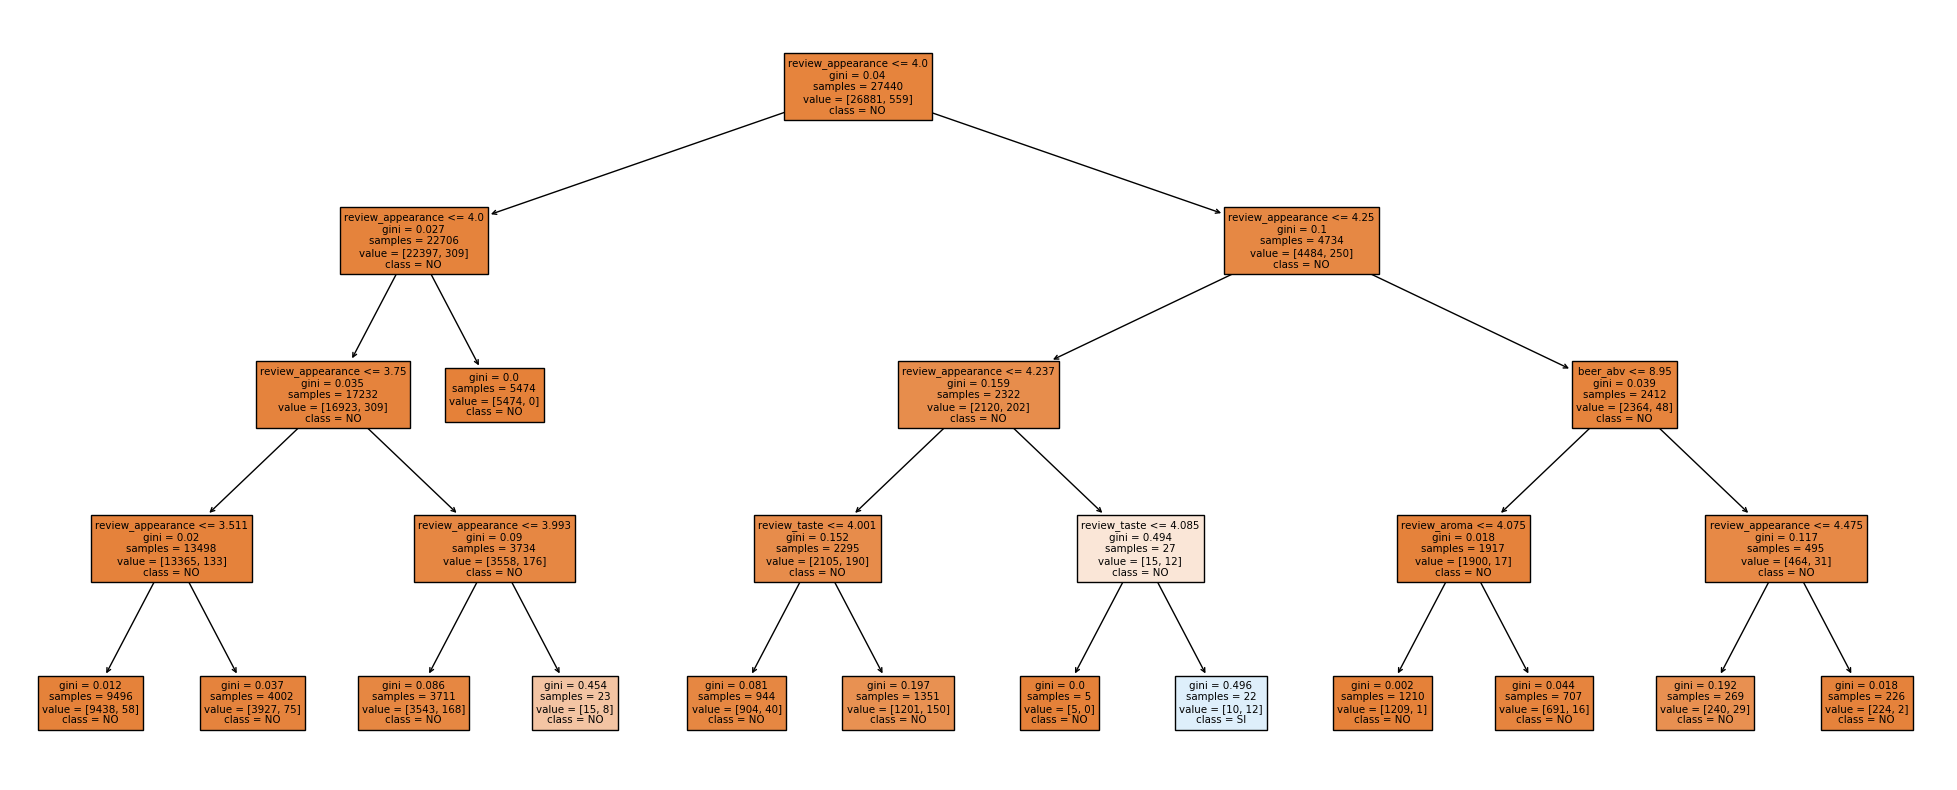

In [14]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(clf, 
                   feature_names=X_training.columns,  
                   class_names=Y_training['POPULAR'].unique(),
                   filled=True)

$$\Large  \text{Ocurrencias "SI" producen ganancia de 4000} \\\  $$
$$\Large  \text{Ocurrencias "NO" producen perdida de 500} \\\  $$

$$\Large  b = \text{numero  de  ocurrencias "SI"} \\\  $$
$$\Large  a = \text{numero  de  ocurrencias "NO"} \\\  $$

$$\Large  {{4000 b - 500 a} \over b}  > 0 \\\  $$

$$\Huge  \text{Pasamos b multiplicando al otro lado} \\\  $$
$$\text{ } \\\  $$
$$\Large \boxed{  {4000 b - 500 a}  > 0 * b} \\\  $$
$$\text{ } \\\  $$
$$\Large \boxed{ {4000 b - 500 a}  > 0} \\\  $$

$$\Huge \text{Dividimos por 500} \\\  $$
$$\normalsize  \text{ } \\\  $$
$$\Large \boxed {{{4000 b - 500 a} \over 500}  > 0} \\\  $$
$$\normalsize  \text{ } \\\  $$
$$\Large  \boxed{{8 b - a}   > 0} \\\  $$

$$\Huge \text{Dividimos por a + b} \\\  $$
$$\normalsize  \text{ } \\\  $$
$$\Large  \boxed{{{8 b - a} \over (a+b)}   > 0} \\\  $$
$$\normalsize  \text{ } \\\  $$
$$\Large  \boxed{{8 b \over (a+b)} - {a \over (a+b)}   > 0} \\\  $$
$$\normalsize  \text{ } \\\  $$
$$\Large  \boxed{8 {b \over (a+b)} - {a \over (a+b)}   > 0} \\\  $$

$$\Huge \text{Convertimos en probabilidades} \\\  $$
$$\normalsize  \text{ } \\\  $$
$$\Large  \boxed{8 \text{ prob(SI)} - \text{prob(NO)}  > 0} \\\  $$

$$\Huge \text{Reemplazamos P(NO) en 1 - P(SI)} \\\  $$
$$\normalsize  \text{ } \\\  $$
$$\Large  \boxed{8 \text{ prob(SI)} - ( 1 - \text{prob(SI)})   > 0} \\\  $$
$$\normalsize  \text{ } \\\  $$
$$\Large  \boxed{8 \text{ prob(SI)} - 1 + \text{prob(SI)}   > 0} \\\  $$
$$\normalsize  \text{ } \\\  $$
$$\Large  \boxed{8 \text{ prob(SI)} + \text{prob(SI)} -1  > 0} \\\  $$
$$\normalsize  \text{ } \\\  $$
$$\Large  \boxed{9 \text{ prob(SI)} -1  > 0} \\\  $$
$$\normalsize  \text{ } \\\  $$
$$\Large  \boxed{9 \text{ prob(SI)}  > 1} \\\  $$
$$\normalsize  \text{ } \\\  $$
$$\Large  \boxed{\text{ prob(SI)}  > {1\over 9}} \therefore \boxed{\text{ prob(NO)}  \le {8\over 9}}\\\  $$
$$\normalsize  \text{ } \\\  $$
$$\Large  \boxed{\text{ prob(SI)}  > 0.\overline1} \therefore \boxed{\text{ prob(NO)}  \le 0.\overline8}\\\  $$

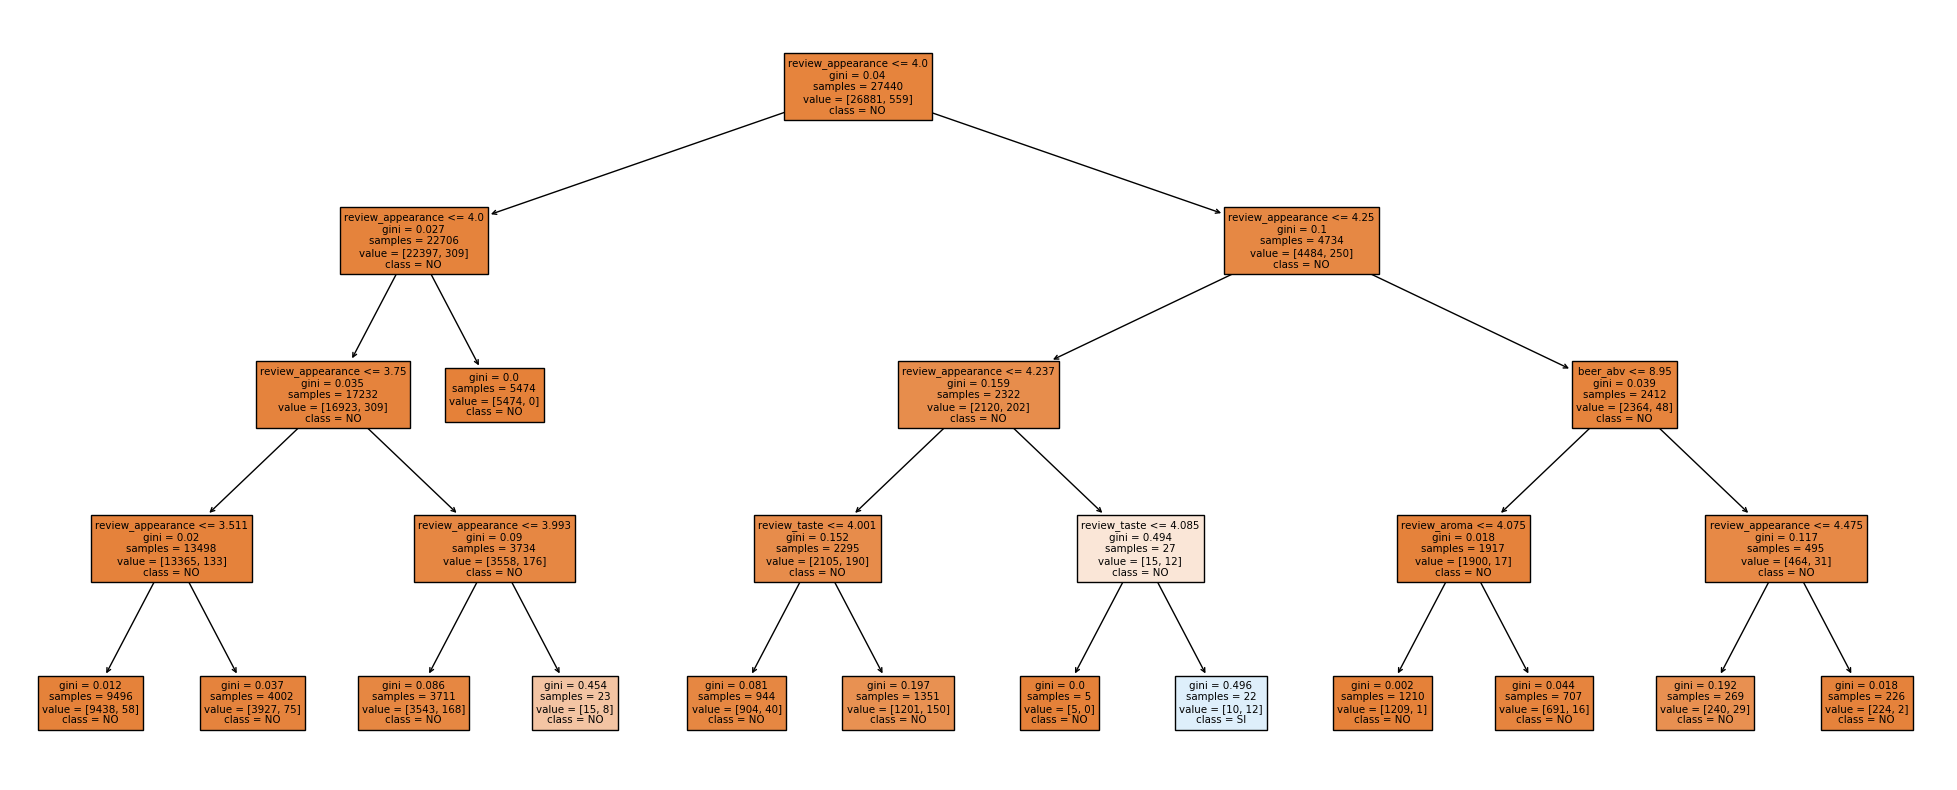

In [15]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(clf, 
                   feature_names=X_training.columns,  
                   class_names=Y_training['POPULAR'].unique(),
                   filled=True)

### Probabilidad de "SI" en cada nodo

In [32]:
p_si = [58/9694, 75/4002, 168/3711, 8/23, 0/5474, 40/944, 150/1351, 0/5, 12/22, 1/1210, 16/707, 26/269, 2/226]
p_si

[0.005983082318960182,
 0.018740629685157422,
 0.04527081649151172,
 0.34782608695652173,
 0.0,
 0.0423728813559322,
 0.11102886750555144,
 0.0,
 0.5454545454545454,
 0.0008264462809917355,
 0.02263083451202263,
 0.09665427509293681,
 0.008849557522123894]

### La clase de cada nodo basada en el umbral de corte calculado

In [33]:
['SI' if x > 0.111111 else 'NO' for x in p_si]

['NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO']

### El puntaje usando los datos de validación (con probabilidades)

In [34]:
Y_validacion_pred_proba = clf.predict_proba(X_validacion)
Y_validacion_pred_proba = pd.DataFrame(Y_validacion_pred_proba, columns = ['NO_prob', 'SI_prob'])
Y_validacion_pred_proba

,NO_prob,SI_prob
0,0.981465,0.018535
1,0.954325,0.045675
2,0.993406,0.006594
3,1.000000,0.000000
4,1.000000,0.000000
...,...,...
11755,0.980000,0.020000
11756,0.993406,0.006594
11757,0.981465,0.018535
11758,0.954325,0.045675


In [35]:
umbral_de_corte = 0.111111112

Y_validacion_pred_proba['prediccion'] = 'NO'
Y_validacion_pred_proba.loc[Y_validacion_pred_proba['SI_prob']>umbral_de_corte,'prediccion'] = 'SI'

Y_validacion_pred_proba.sample(n=20, random_state=1)

,NO_prob,SI_prob,prediccion
8032,0.993406,0.006594,NO
8356,0.981465,0.018535,NO
7760,1.000000,0.000000,NO
4974,0.993406,0.006594,NO
761,1.000000,0.000000,NO
10210,0.954325,0.045675,NO
7474,1.000000,0.000000,NO
8500,0.993406,0.006594,NO
4325,0.954325,0.045675,NO
10508,1.000000,0.000000,NO


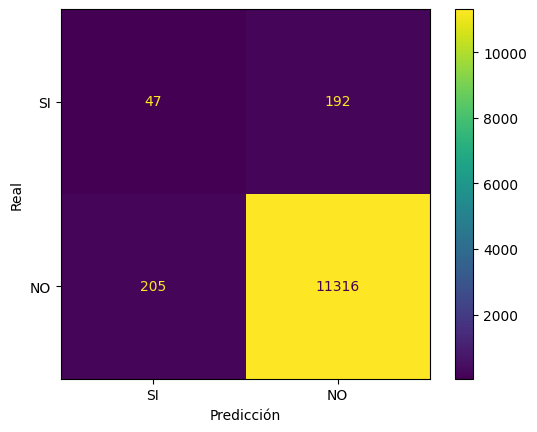

In [36]:
cm = confusion_matrix(Y_validacion, Y_validacion_pred_proba['prediccion'], labels=['SI', 'NO'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['SI', 'NO'])
disp.plot()
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [37]:
true_positives = cm[0,0]
true_negatives = cm[1,1]
false_positives = cm[1, 0]
false_negatives = cm[0,1]

[true_positives, false_positives, true_negatives, false_negatives]

[47, 205, 11316, 192]

In [38]:
metrica_negocio = ((4000*true_positives) - (500*false_positives))/(true_positives + false_negatives)
metrica_negocio

357.74058577405856

### Probamos con testing

In [39]:
directorio_data = '../data/'

x_training_file = directorio_data + 'x_traininig.csv'
y_training_file = directorio_data + 'y_traininig.csv'

x_testing_file = directorio_data + 'x_testing.csv'
y_testing_file = directorio_data + 'y_testing.csv'

In [40]:
X_training = pd.read_csv(x_training_file)
Y_training = pd.read_csv(y_training_file)

X_testing = pd.read_csv(x_testing_file)
Y_testing = pd.read_csv(y_testing_file)

In [41]:
columnas = [
    "review_overall",
    "review_aroma",
    "review_appearance",
    "review_palate",
    "review_taste",
    "beer_abv"
]

In [42]:
X_training = X_training[columnas]
X_testing = X_testing[columnas]

### Creamos nuestro modelo

In [43]:
max_depth = 4
criterion='gini'
clf = DecisionTreeClassifier(
            criterion = criterion,
            max_depth=max_depth,
            random_state=random_state
        )
_ = clf.fit(X_training, Y_training)

### Realizamos la prediccion

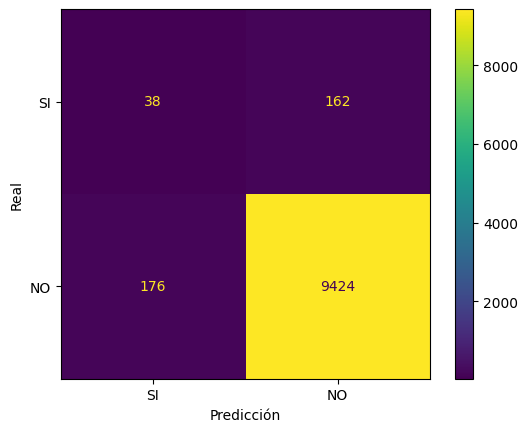

In [44]:
umbral_de_corte = 0.111111112

Y_testing_pred_proba = clf.predict_proba(X_testing)
Y_testing_pred_proba = pd.DataFrame(Y_testing_pred_proba, columns = ['NO_prob', 'SI_prob'])

Y_testing_pred_proba['prediccion'] = 'NO'
Y_testing_pred_proba.loc[Y_testing_pred_proba['SI_prob']>umbral_de_corte,'prediccion'] = 'SI'

cm = confusion_matrix(Y_testing, Y_testing_pred_proba['prediccion'], labels=['SI', 'NO'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['SI', 'NO'])
disp.plot()
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [45]:
true_positives = cm[0,0]
true_negatives = cm[1,1]
false_positives = cm[1, 0]
false_negatives = cm[0,1]

[true_positives, false_positives, true_negatives, false_negatives]

[38, 176, 9424, 162]

In [46]:
metrica_negocio = ((4000*true_positives) - (500*false_positives))/(true_positives + false_negatives)
metrica_negocio

320.0